#  Iris Flower Classification — Machine Learning Project
This notebook demonstrates an end-to-end machine learning workflow using the Iris dataset.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IRIS.csv.xlsx to IRIS.csv.xlsx


In [ ]:
# Step 1
import pandas as pd
import numpy as np

# For quick plots (matplotlib)
import matplotlib.pyplot as plt

# If you want nicer plots later, we'll use seaborn (not required now)
import seaborn as sns

# Show plots inline (Colab does this by default, but it's explicit)
%matplotlib inline


In [ ]:
filename = next(iter(uploaded.keys()))
print("Uploaded file detected:", filename)

Uploaded file detected: IRIS.csv.xlsx


## Dataset Overview
In this section, I loaded the Iris dataset and inspected its structure, features, and target variable.


In [ ]:
import pandas as pd

try:
    df = pd.read_csv(filename)
    print("Loaded as CSV.")
except Exception as e_csv:
    try:
        df = pd.read_excel(filename)
        print("Loaded as Excel.")
    except Exception as e_xls:
        print("Could not read file as CSV or Excel.")
        print("CSV error:", e_csv)
        print("Excel error:", e_xls)
        raise

Loaded as Excel.


In [ ]:
# Show first rows and basic info
print("First 8 rows:")
display(df.head(8))   # nicer display in Colab

print("\nDataset shape (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nNon-null counts and memory info:")
df.info()

print("\nNumeric summary (describe):")
display(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


First 8 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa



Dataset shape (rows, columns): (150, 5)

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Non-null counts and memory info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Numeric summary (describe):


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Normalize column names to lowercase and replace spaces with underscore
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Normalized column names:", df.columns.tolist())


Normalized column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


## Understanding the Dataset
Here I examined the dataset size, columns, data types, and class distribution.


In [ ]:
# Check target column candidates
possible_target_names = ['species', 'class', 'variety', 'flower_class']

# Try the most common names first
target_col = None
for name in possible_target_names:
    if name in df.columns:
        target_col = name
        break

# If not found, choose the last column as likely target
if target_col is None:
    target_col = df.columns[-1]
    print("No common target name found; using last column as target:", target_col)
else:
    print("Detected target column:", target_col)

# Show distribution
print("\nClass distribution:")
print(df[target_col].value_counts())


Detected target column: species

Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


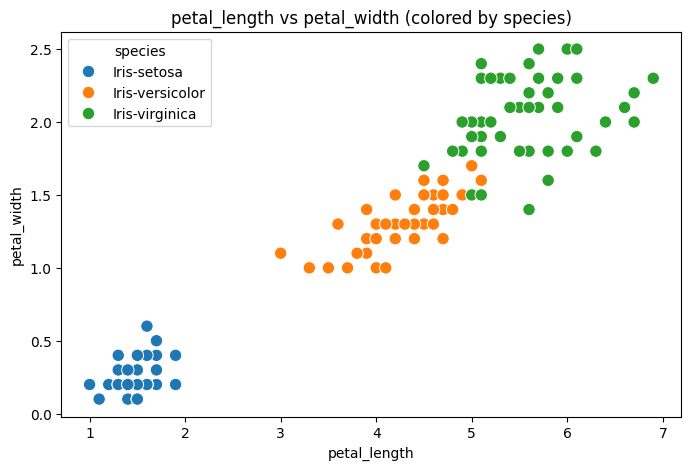

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# If you've normalized column names, use these typical names:
x_col = 'petal_length' if 'petal_length' in df.columns else df.columns[0]
y_col = 'petal_width'  if 'petal_width'  in df.columns else df.columns[1]

plt.figure(figsize=(8,5))
if target_col in df.columns:
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=target_col, s=80)
    plt.title(f"{x_col} vs {y_col} (colored by {target_col})")
else:
    print("Target column not found; cannot color the plot.")


In [ ]:
# Step 2.1 — load the uploaded file (safe, works whether you used files.upload() or already have a filename)
from google.colab import files
import io
import pandas as pd

# if you just ran uploaded = files.upload(), use:
try:
    uploaded  # if variable exists
except NameError:
    uploaded = files.upload()   # will open file picker if not already uploaded

# get the first filename (robust)
filename = next(iter(uploaded.keys()))
print("Uploaded filename:", filename)

# read into DataFrame (try csv first, fallback to Excel)
try:
    df = pd.read_csv(filename)
except Exception as e:
    print("Read CSV failed — trying Excel. Error:", e)
    df = pd.read_excel(filename)

# quick confirm
print("Loaded df shape:", df.shape)


Uploaded filename: IRIS.csv.xlsx
Read CSV failed — trying Excel. Error: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte
Loaded df shape: (150, 5)


In [ ]:
# Step 2.2 — reproduce the outputs you saw
print("First 8 rows:\n")
display(df.head(8))        # Colab nicer display

print("\nDataset shape:", df.shape)
print("Column names:", df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nInfo (non-null counts):")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumeric summary (describe):")
display(df.describe())

# If you normalized column names earlier, show command (optional)
print("\nNormalized column names (example to normalize):")
print([c.strip().lower().replace(' ', '_') for c in df.columns])


First 8 rows:



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa



Dataset shape: (150, 5)
Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Info (non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Numeric summary (describe):


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Normalized column names (example to normalize):
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [ ]:
# Step 2.3 — target & class distribution
print("Detected target column possibilities (string columns):")
print([c for c in df.columns if df[c].dtype == 'object'])   # likely 'species'

print("\nClass distribution (species):")
print(df['species'].value_counts())


Detected target column possibilities (string columns):
['species']

Class distribution (species):
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)
In this section, I visualized feature distributions and relationships to understand patterns in the data.



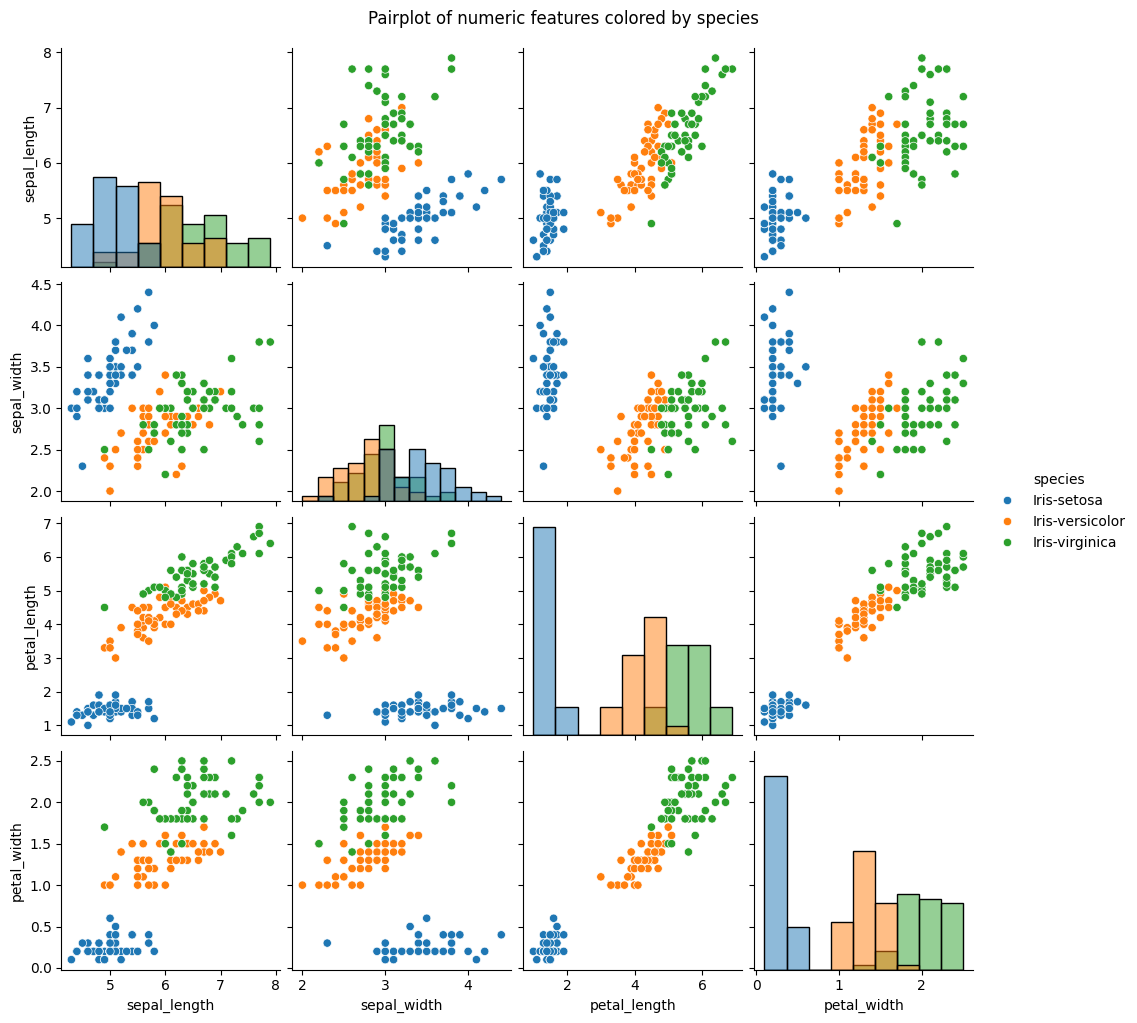

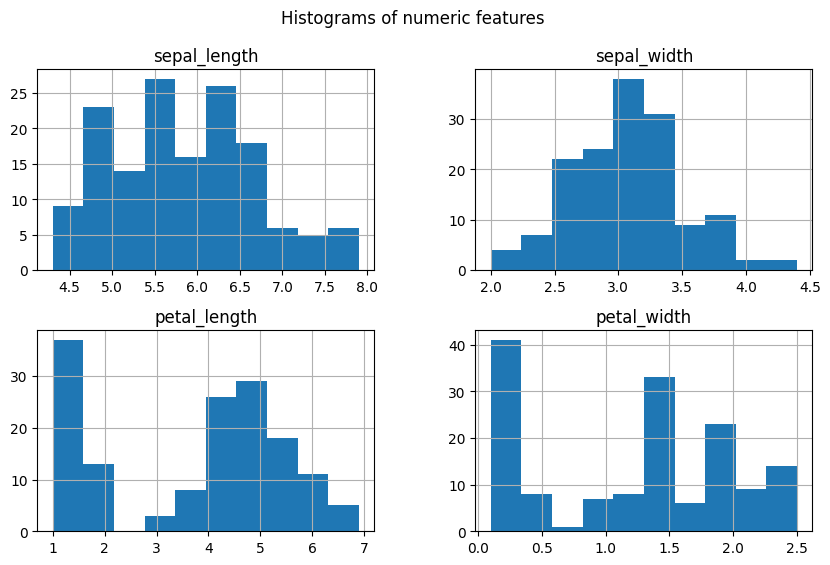

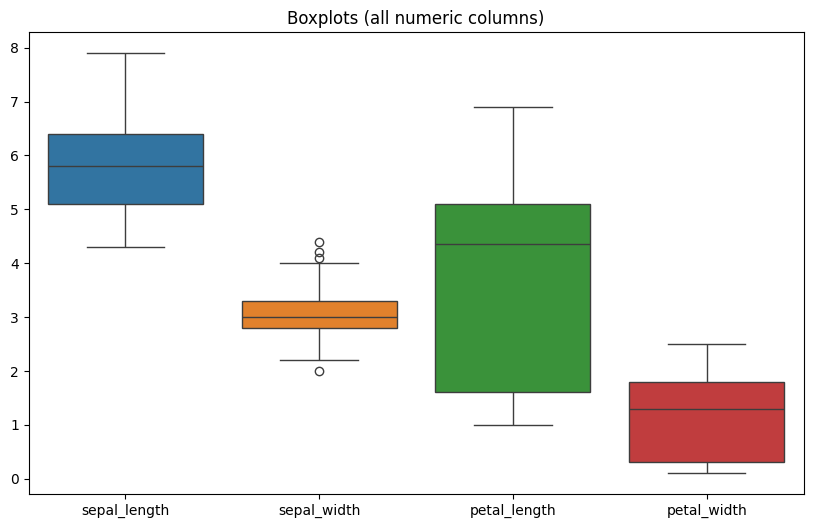

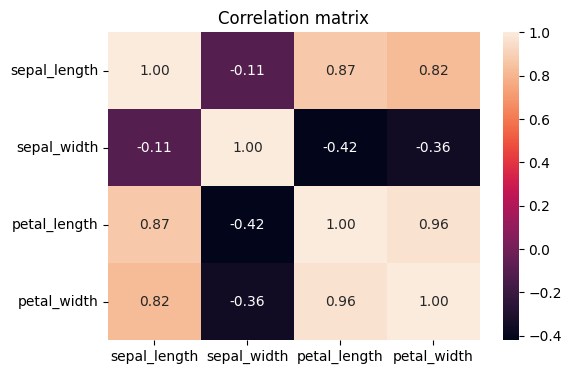

In [ ]:
# Step 2.4 — plotting (seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Pairplot (scatter + hist) — great to see relationships and separation of species
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Pairplot of numeric features colored by species", y=1.02)
plt.show()

# 2) Histogram of each numeric column
df.hist(figsize=(10,6))
plt.suptitle("Histograms of numeric features")
plt.show()

# 3) Boxplots to check spread & outliers by species
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=['species']))
plt.title("Boxplots (all numeric columns)")
plt.show()

# 4) Correlation heatmap (only numeric cols)
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

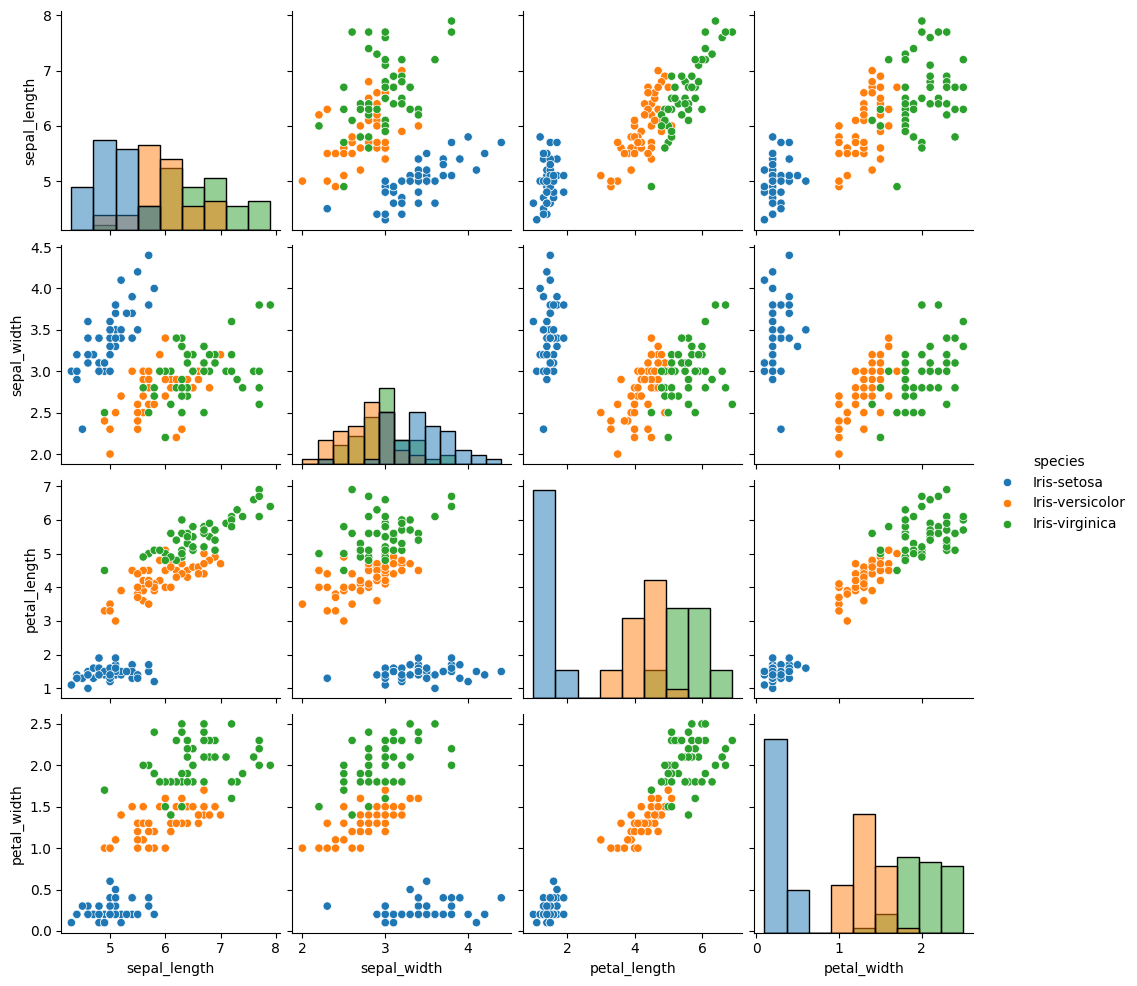

In [ ]:
# Step 2.5 — save a plot to disk and download (example: pairplot)
import matplotlib
sns_plot = sns.pairplot(df, hue='species', diag_kind='hist')
sns_plot.savefig("iris_pairplot.png")    # save in the Colab VM
from google.colab import files
files.download("iris_pairplot.png")      # will download to your local machine


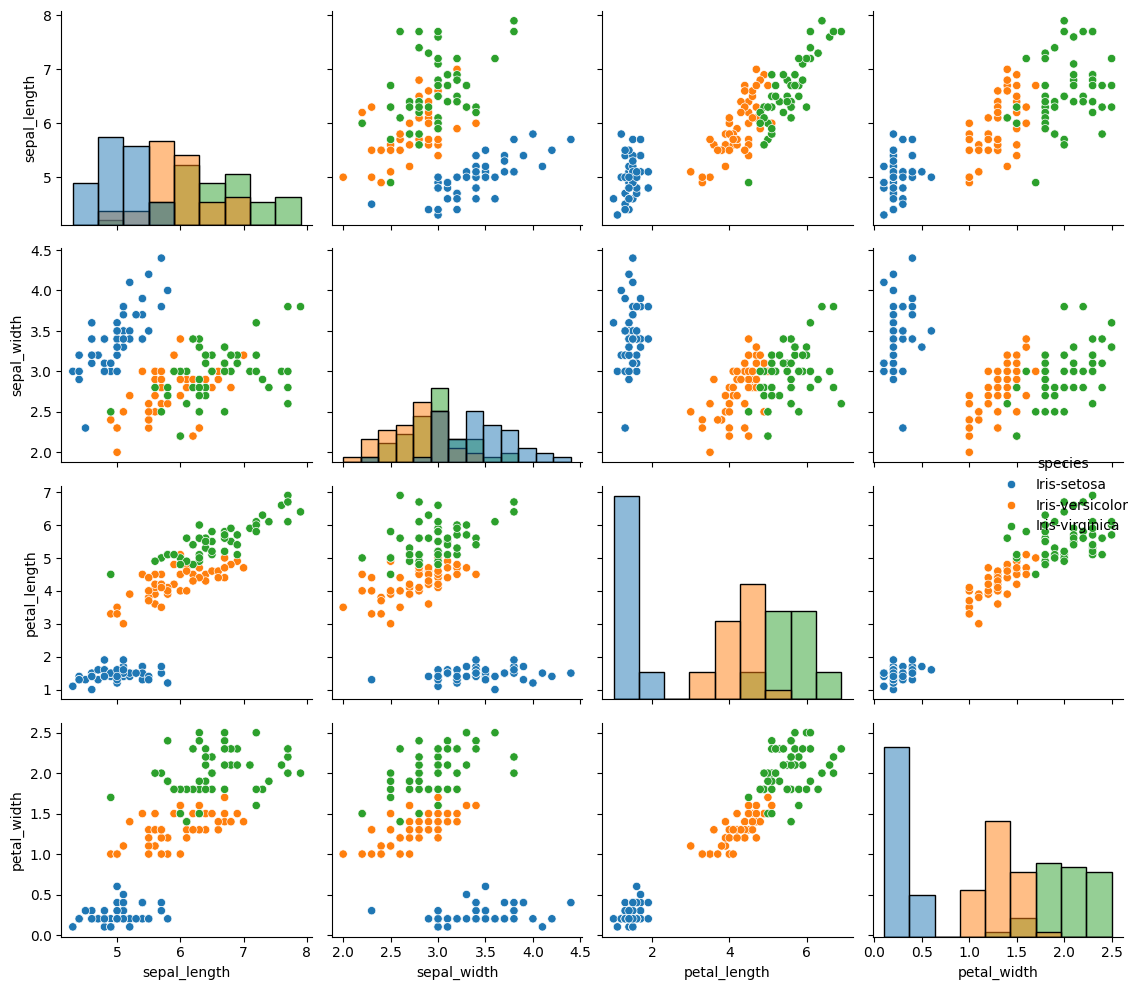

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# example pairplot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.tight_layout()
plt.savefig('iris_pairplot.png', dpi=150)   # saves to /content in Colab
plt.show()

# optional: trigger browser download (Colab)
from google.colab import files
files.download('iris_pairplot.png')   # this triggers the browser download


## Data Preparation
The dataset is split into training and testing sets to evaluate model performance fairly.


In [ ]:
# Step 3 code: preprocess, split, baseline model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# assume df already loaded
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
y = df['species'].values

# encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)   # 0,1,2 (mapping in le.classes_)

print("Label classes:", le.classes_)   # shows mapping: e.g. ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)

# optional: scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# baseline model: Logistic Regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_s, y_train)

# predictions + metrics
y_pred = clf.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Label classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Shapes -> X_train: (120, 4) X_test: (30, 4)
Accuracy: 0.9333333333333333

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


## Model Training
Multiple machine learning models are trained and compared on the Iris dataset.


In [ ]:
# =========================
# STEP 4 : COMPLETE PIPELINE (COMBINED)
# =========================

# 4.1 Imports
import os
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 4.2 Sanity check (important for beginners)
# -------------------------
print("Checking required variables...\n")

required_vars = ["X_train", "X_test", "y_train", "y_test"]
for var in required_vars:
    print(f"{var} exists:", var in globals())

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

# -------------------------
# 4.3 Compare multiple models using Cross-Validation
# -------------------------
print("\n=== MODEL COMPARISON (Cross-Validation) ===")

models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name:18} CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# -------------------------
# 4.4 Hyperparameter tuning using GridSearchCV (RandomForest)
# -------------------------
print("\n=== GRID SEARCH (RandomForest) ===")

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best CV Score :", grid.best_score_)

# -------------------------
# 4.5 Evaluate best model on TEST set
# -------------------------
print("\n=== TEST SET EVALUATION ===")

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# -------------------------
# 4.6 Save model safely (NO FileNotFoundError)
# -------------------------
print("\n=== SAVING MODEL ===")

model_dir = "/content/iris-ml-project/model"
os.makedirs(model_dir, exist_ok=True)

model_path = f"{model_dir}/best_model_rf.joblib"
joblib.dump(best_model, model_path)

print("Model saved at:", model_path)
print("File exists:", os.path.exists(model_path))

# -------------------------
# 4.7 Load model back (sanity check)
# -------------------------
print("\n=== LOADING MODEL BACK ===")

loaded_model = joblib.load(model_path)
y_loaded_pred = loaded_model.predict(X_test)

print("Loaded model test accuracy:",
      accuracy_score(y_test, y_loaded_pred))

print("\n=== STEP 4 COMPLETED SUCCESSFULLY ===")


Checking required variables...

X_train exists: True
X_test exists: True
y_train exists: True
y_test exists: True

Shapes:
X_train: (120, 4)
X_test : (30, 4)

=== MODEL COMPARISON (Cross-Validation) ===
LogisticRegression CV accuracy: 0.9667 ± 0.0167
RandomForest       CV accuracy: 0.9500 ± 0.0167
SVC                CV accuracy: 0.9750 ± 0.0204
KNN                CV accuracy: 0.9750 ± 0.0333

=== GRID SEARCH (RandomForest) ===
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters: {'max_depth': None, 'n_estimators': 10}
Best CV Score : 0.9583333333333334

=== TEST SET EVALUATION ===
Test Accuracy: 0.9666666666666667

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
we

## Feature Importance Analysis
This section explains which features influence the models predictions the most.


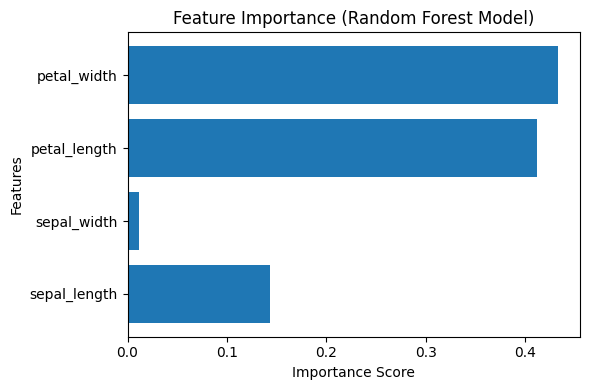

sepal_length    : 0.1433
sepal_width     : 0.0112
petal_length    : 0.4121
petal_width     : 0.4334


In [ ]:
import matplotlib.pyplot as plt

feature_names = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width'
]

importances = best_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest Model)")
plt.tight_layout()
plt.show()

for name, score in zip(feature_names, importances):
    print(f"{name:15} : {score:.4f}")


### Interpretation

The feature importance analysis shows that petal length and petal width are the most influential features in predicting the Iris species. Sepal length and sepal width contribute less to the model’s predictions. This aligns with known characteristics of the Iris dataset, where petal measurements provide clearer separation between species.


## Final Conclusion

In this project, a complete end-to-end machine learning pipeline was built to classify Iris flower species based on sepal and petal measurements. The dataset was explored using exploratory data analysis to understand feature distributions and class balance. Multiple machine learning models were trained and compared using cross-validation, and hyperparameter tuning was performed to select an optimal model.

The final model demonstrated strong performance on unseen test data, achieving approximately 97% accuracy, indicating good generalization. Feature importance analysis revealed that petal length and petal width were the most influential features for classification, which aligns with known domain knowledge of the Iris dataset.

Overall, this project demonstrates a solid understanding of fundamental machine learning concepts including data preprocessing, model training, evaluation, interpretation, and reproducibility. This work can be further extended by adding a user interface or deploying the model as a web application.
